## Questão 1

Quando os parâmetros de uma rede MLP são inicializados com os mesmos valores, a rede é incapaz de contornar o problema da simetria. Se dois ou mais perceptrons de uma mesma camada oculta começam com os mesmos pesos e vieses, eles produzirão a mesma saída para a mesma entrada. Em um ambiente determinístico, onde tanto o algoritmo de aprendizado, como o gradiente descendente, quanto a função de custo são fixos, saídas e gradientes idênticos durante a retropropagação farão com que os neurônios atualizem seus pesos da mesma forma. Essa falta de divergência no aprendizado significa que os neurônios permanecem sincronizados durante todo o processo de treinamento, impedindo-os de se especializarem ou aprenderem diferentes aspectos dos dados. Tal redundância reduz a capacidade da rede de modelar padrões complexos, leva a um aprendizado ineficiente, pois vários neurônios realizam o mesmo trabalho, e pode fazer com que a rede fique presa em mínimos locais ou exiba uma trajetória de convergência ruim devido à falta de diversidade nos gradientes necessários para navegar pela superfície de perda.

## Questão 2

A escolha de ativações lineares no modelo MLP faria com que, independente da quantidade de camadas ocultas, ele agisse como se apenas possuísse uma única camada. Além disso, esse modelo seria capaz apenas de encontrar combinações lineares entre as diferentes covariáveis das entradas. Ou seja, a rede não poderá modelar relações mais complexas entre os dados e está longe de ser um aproximador universal, visto que apenas transformações lineares das entradas são aprendidas. 

## Questão 3

-  a) A operação de convolução em redes neurais aplica um filtro (kernel) em pequenas regiões dos dados de entrada. Isso faz com que cada elemento do kernel esteja conectado a poucos elementos dos dados de entrada, diferentemente da multiplicação matricial da arquitetura MLP que relacionada todos os elementos da entrada a todos os neurônios da camada seguinte. Ainda assim, cada neurônio do kernel é relacionado a pelo menos um elemento, o que pode ser interpretado como uma rede MLP com conectividade esparsa. 
-  b) A aplicação do mesmo kernel pela imagem completa faz com que cada camada convolucional veja todos os pixels da imagem e seja capaz de identificar diferentes características dela.
-  c) Compartilhamento de pesos refere-se ao uso do mesmo parâmetro para mais de uma função em um modelo. No modelo MLP, cada elemento da matriz de pesos é usado exatamente uma vez ao calcular a saída de uma camada. Ele é multiplicado por um elemento da entrada e depois nunca mais é revisitado. Em uma rede convolucional, cada elemento do kernel é usado em todas as posições da entrada. O compartilhamento de parâmetros usado pela operação de convolução significa que, em vez de aprender um conjunto separado de parâmetros para cada local, aprendemos apenas um único conjunto.

## Questão 4

A arquitetura da primeira rede convolucional possui menos parâmetros. Apesar do tamanho da primeira camada fully-connected do segundo modelo ser reduzida por conta do pooling de stride 2 que a precede, a camada convolucional adicional tem 25001000 novos parametros. Esse ganho de parâmetros torna a rede substancialmente maior. 

In [4]:
import torch
import torch.nn as nn

In [17]:
model1 = nn.Sequential(
            nn.Conv2d(1, 1000, 5),
            nn.MaxPool2d(2),
            nn.Conv2d(1000, 1000, 5),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(4*4*1000, 1000),
            nn.ReLU(),
            nn.Linear(1000, 10))           

model2 = nn.Sequential(
            nn.Conv2d(1, 1000, 5),
            nn.MaxPool2d(2),
            nn.Conv2d(1000, 1000, 5),
            nn.MaxPool2d(2),
            nn.Conv2d(1000, 1000, 5, padding=2),
            nn.MaxPool2d(2, 2),
            nn.Flatten(),
            nn.Linear(4*1000, 1000),
            nn.ReLU(),
            nn.Linear(1000, 10))           


In [27]:
def count(model):
    num_total = 0 
    for name, layer in model.named_children():
        num_params = sum(p.numel() for p in layer.parameters())
        num_total += num_params
        print(f"Layer {name}: {num_params} parametros")
    print(f"Total: {num_total}")

In [28]:
print(count(model1))

print(count(model2))

Layer 0: 26000 parametros
Layer 1: 0 parametros
Layer 2: 25001000 parametros
Layer 3: 0 parametros
Layer 4: 0 parametros
Layer 5: 16001000 parametros
Layer 6: 0 parametros
Layer 7: 10010 parametros
Total: 41038010
None
Layer 0: 26000 parametros
Layer 1: 0 parametros
Layer 2: 25001000 parametros
Layer 3: 0 parametros
Layer 4: 25001000 parametros
Layer 5: 0 parametros
Layer 6: 0 parametros
Layer 7: 4001000 parametros
Layer 8: 0 parametros
Layer 9: 10010 parametros
Total: 54039010
None


## Questão 6

a) O conjunto contém um total de 60.000 imagens coloridas, com dimensões de 32x32 pixels e três canais de cor (RGB). Destas imagens, 50.000 são usadas para treinamento e 10.000 para teste. As imagens são distribuídas igualmente entre 10 classes diferentes: avião, automóvel, pássaro, gato, veado, cachorro, sapo, cavalo, navio e caminhão. Cada classe possui 6.000 imagens, o que garante uma distribuição balanceada dos dados.


In [29]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
])

trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

num_train_images = len(trainset)
num_test_images = len(testset)
total_images = num_train_images + num_test_images
image_shape = trainset[0][0].shape
classes = trainset.classes

print(f"Número total de imagens: {total_images}")
print(f"Número de imagens de treinamento: {num_train_images}")
print(f"Número de imagens de teste: {num_test_images}")
print(f"Dimensões das imagens: {image_shape}")
print(f"Classes presentes no conjunto de dados: {classes}")

Files already downloaded and verified
Files already downloaded and verified
Número total de imagens: 60000
Número de imagens de treinamento: 50000
Número de imagens de teste: 10000
Dimensões das imagens: torch.Size([3, 32, 32])
Classes presentes no conjunto de dados: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


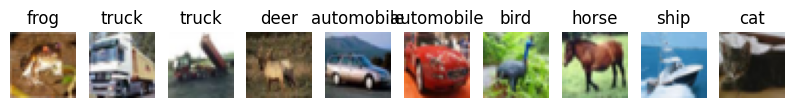

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")

transform = transforms.Compose([
    transforms.ToTensor(),
])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=False)

dataiter = iter(trainloader)
images, labels = next(dataiter)

classes = trainset.classes

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    imshow(images[i])
    plt.title(classes[labels[i]])
    plt.axis("off")

In [42]:
%run 'item_d.py'

Files already downloaded and verified
Files already downloaded and verified
RedeBase(
  (layers): ModuleList(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=25088, out_features=120, bias=True)
    (4): ReLU()
    (5): Linear(in_features=120, out_features=84, bias=True)
    (6): ReLU()
    (7): Linear(in_features=84, out_features=10, bias=True)
  )
)
Epoch: 1/5, Loss: 1.4414
Epoch 1/5, Train Accuracy: 48.12%
Epoch 1/5, Test Accuracy: 54.88%
Epoch: 2/5, Loss: 1.1081
Epoch 2/5, Train Accuracy: 60.66%
Epoch 2/5, Test Accuracy: 61.74%
Epoch: 3/5, Loss: 0.9142
Epoch 3/5, Train Accuracy: 67.69%
Epoch 3/5, Test Accuracy: 63.39%
Epoch: 4/5, Loss: 0.7682
Epoch 4/5, Train Accuracy: 72.91%
Epoch 4/5, Test Accuracy: 63.07%
Epoch: 5/5, Loss: 0.6284
Epoch 5/5, Train Accuracy: 77.90%
Epoch 5/5, Test Accuracy: 63.95%
RedeBase(
  (layers): ModuleList(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))

A acurácia de treino do melhor modelo treinado no item anterior piorou com a adição de dropout após cada camada convolucional.

In [43]:
%run 'item_f.py'

Files already downloaded and verified
Files already downloaded and verified
RedeBase(
  (layers): ModuleList(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.25, inplace=False)
    (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): Dropout(p=0.25, inplace=False)
    (6): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
    (7): ReLU()
    (8): Dropout(p=0.25, inplace=False)
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=51200, out_features=120, bias=True)
    (11): ReLU()
    (12): Linear(in_features=120, out_features=84, bias=True)
    (13): ReLU()
    (14): Linear(in_features=84, out_features=10, bias=True)
  )
)
Epoch: 1/5, Loss: 1.5653
Epoch 1/5, Train Accuracy: 42.79%
Epoch 1/5, Test Accuracy: 53.70%
Epoch: 2/5, Loss: 1.1999
Epoch 2/5, Train Accuracy: 57.28%
Epoch 2/5, Test Accuracy: 61.72%
Epoch: 3/5, Loss: 1.0298
Epoch 3/5, Train Accuracy: 63.64%
Epoch 3/5, Test Accuracy: 64.83%